In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

In [6]:
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

In [7]:
data = pd.read_csv('nasa.csv')
df = data.copy()
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [9]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace(".", "_")
df.columns = df.columns.str.lower()

In [10]:
df.columns

Index(['neo_reference_id', 'name', 'absolute_magnitude', 'est_dia_in_km(min)',
       'est_dia_in_km(max)', 'est_dia_in_m(min)', 'est_dia_in_m(max)',
       'est_dia_in_miles(min)', 'est_dia_in_miles(max)',
       'est_dia_in_feet(min)', 'est_dia_in_feet(max)', 'close_approach_date',
       'epoch_date_close_approach', 'relative_velocity_km_per_sec',
       'relative_velocity_km_per_hr', 'miles_per_hour',
       'miss_dist_(astronomical)', 'miss_dist_(lunar)',
       'miss_dist_(kilometers)', 'miss_dist_(miles)', 'orbiting_body',
       'orbit_id', 'orbit_determination_date', 'orbit_uncertainity',
       'minimum_orbit_intersection', 'jupiter_tisserand_invariant',
       'epoch_osculation', 'eccentricity', 'semi_major_axis', 'inclination',
       'asc_node_longitude', 'orbital_period', 'perihelion_distance',
       'perihelion_arg', 'aphelion_dist', 'perihelion_time', 'mean_anomaly',
       'mean_motion', 'equinox', 'hazardous'],
      dtype='object')

In [11]:
df.nunique().sort_values(ascending=True)

orbiting_body                      1
equinox                            1
hazardous                          2
orbit_uncertainity                10
orbit_id                         188
absolute_magnitude               269
est_dia_in_m(max)                269
est_dia_in_km(min)               269
est_dia_in_feet(max)             269
est_dia_in_miles(min)            269
est_dia_in_feet(min)             269
est_dia_in_miles(max)            269
est_dia_in_m(min)                269
est_dia_in_km(max)               269
epoch_osculation                 429
close_approach_date              777
epoch_date_close_approach        777
jupiter_tisserand_invariant     2495
orbit_determination_date        2680
minimum_orbit_intersection      3678
neo_reference_id                3692
inclination                     3692
semi_major_axis                 3692
name                            3692
orbital_period                  3692
mean_motion                     3692
aphelion_dist                   3692
p

In [12]:
df[['orbiting_body','equinox']]

,orbiting_body,equinox
0,Earth,J2000
1,Earth,J2000
2,Earth,J2000
3,Earth,J2000
4,Earth,J2000
...,...,...
4682,Earth,J2000
4683,Earth,J2000
4684,Earth,J2000
4685,Earth,J2000


In [13]:
drop_list = ['equinox','orbiting_body','neo_reference_id','name','orbit_id','close_approach_date','orbit_determination_date']

In [14]:
df.drop(columns=drop_list, axis=1,inplace=True)

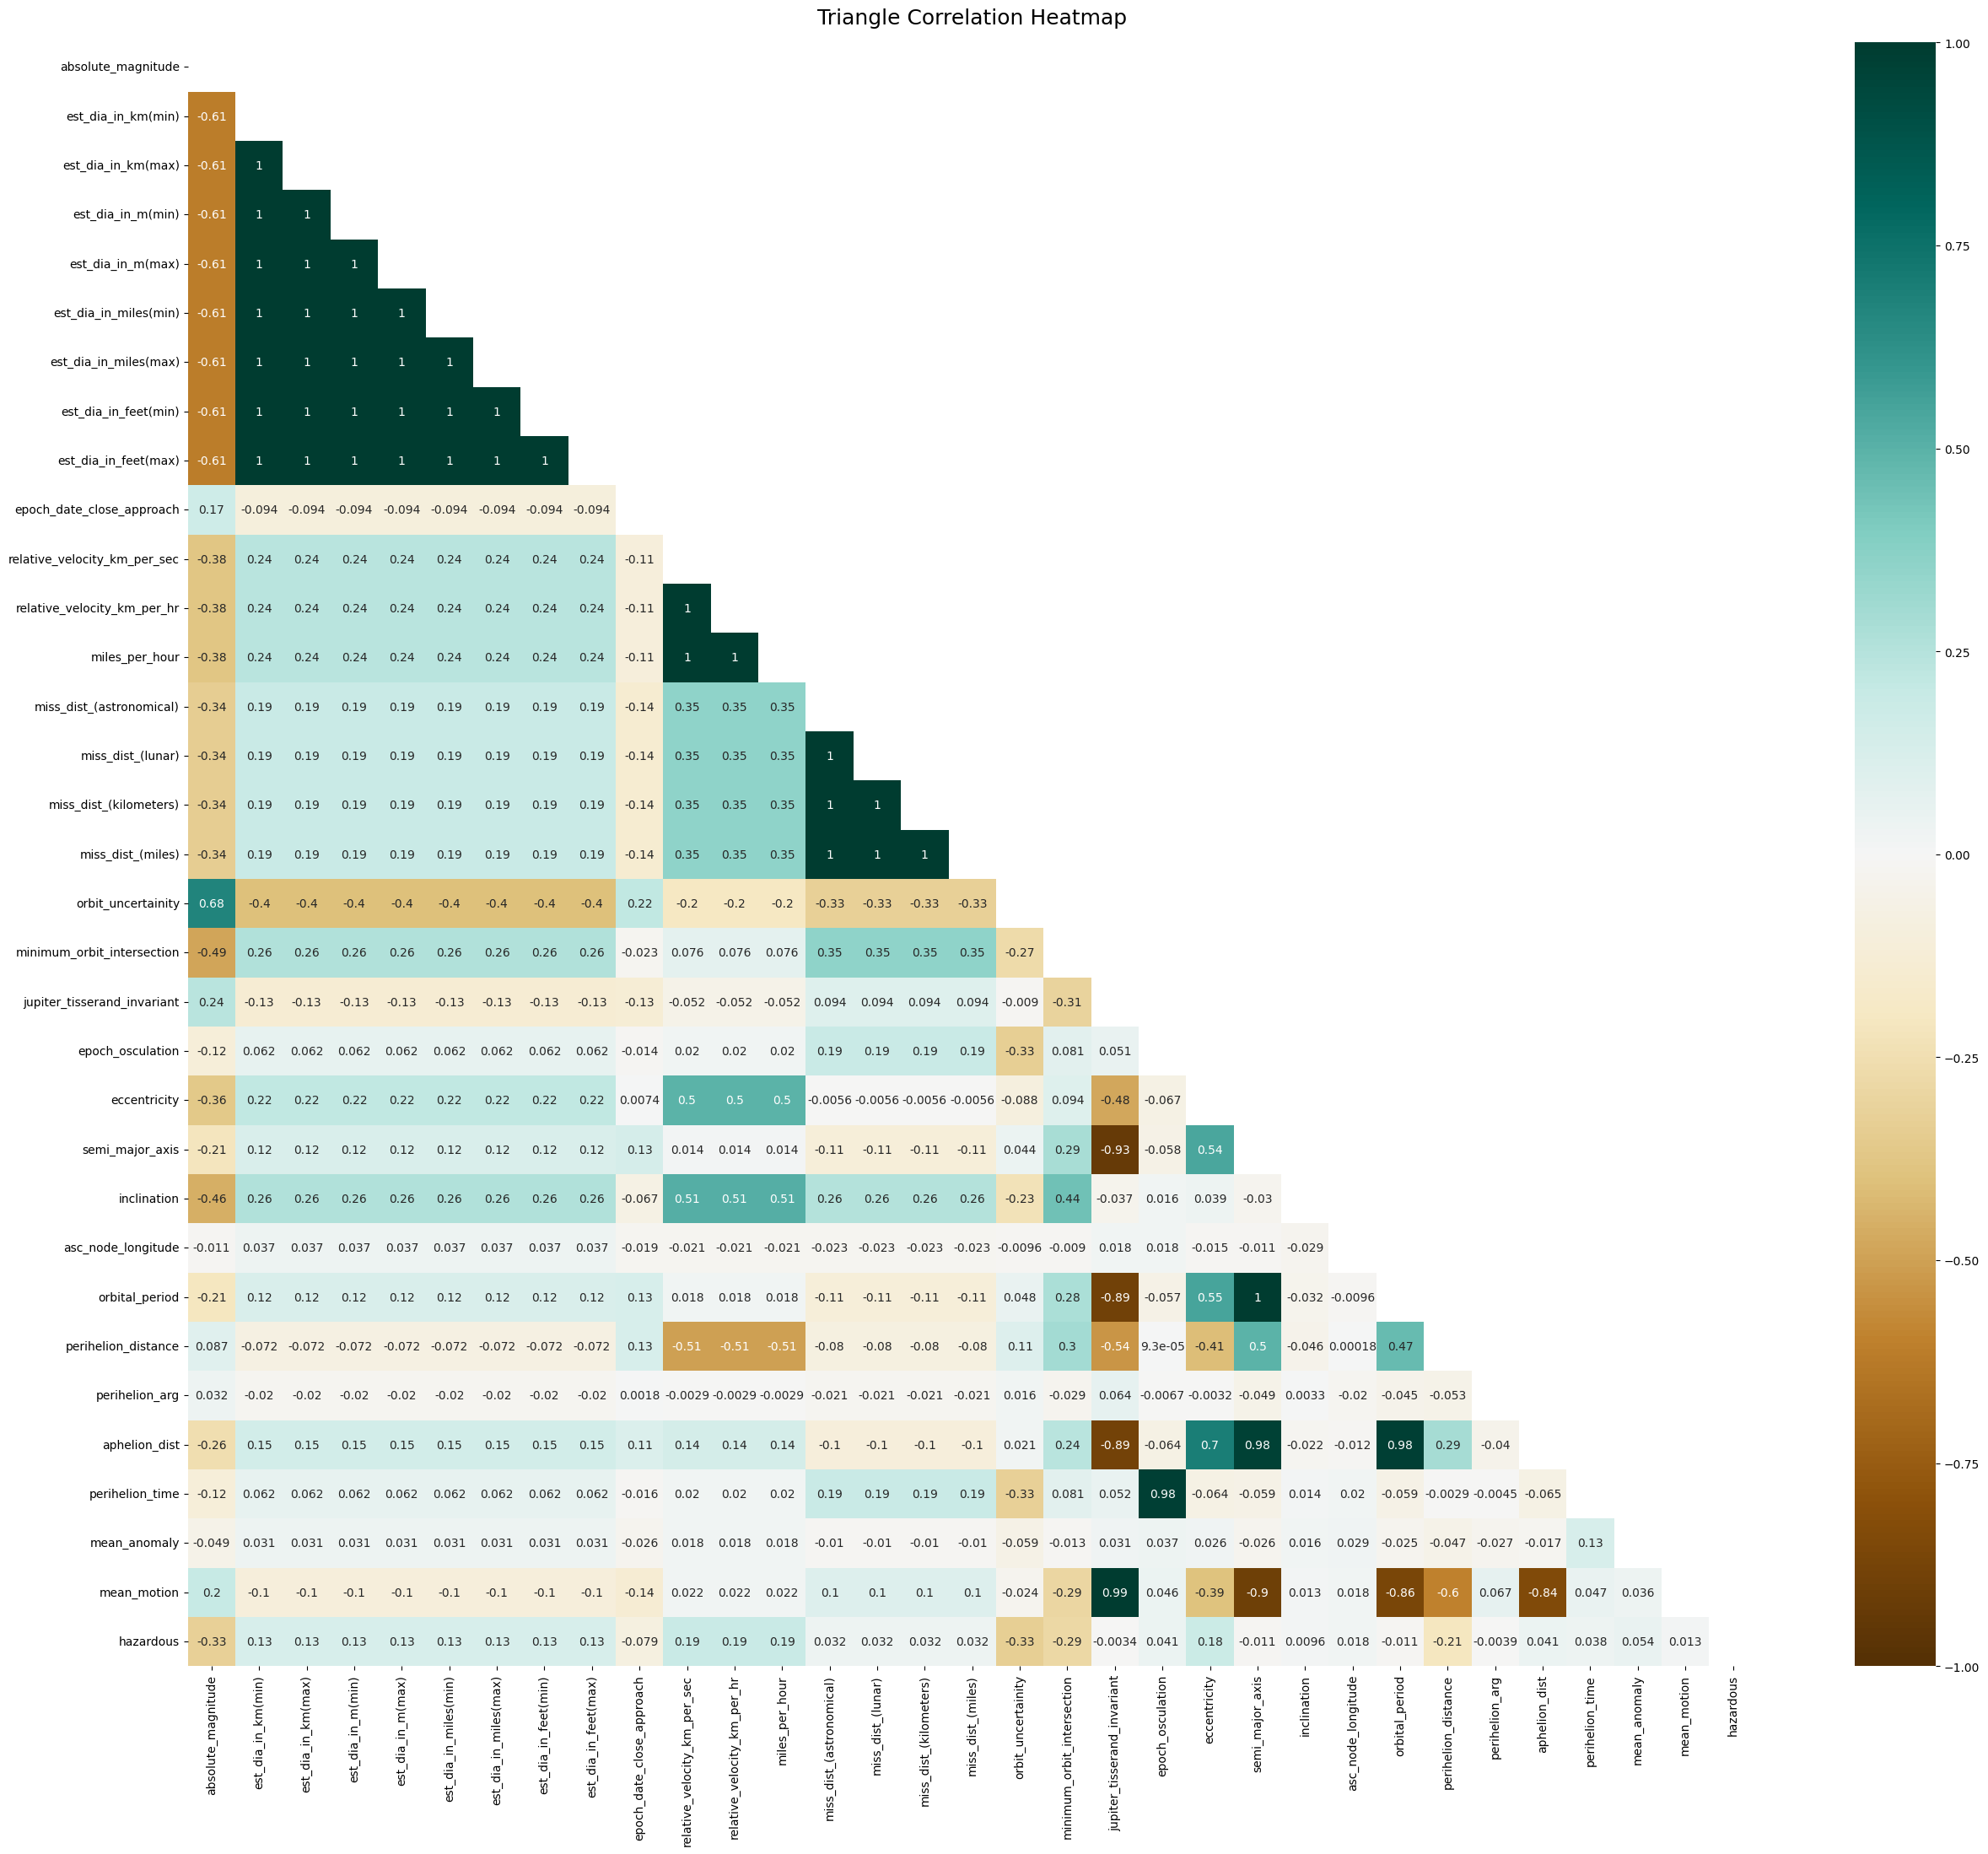

In [15]:
plt.figure(figsize=(30,25))
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize' : 18}, pad=16)
plt.show()

In [16]:
corr_matrix = df.corr()

threshold = 0.95 

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

data = df.drop(columns=to_drop)

print(f'Columns dropped : {to_drop}')
print('-----------------------------')
print(f'Remaining Columns : {df.columns}')

Columns dropped : ['est_dia_in_km(max)', 'est_dia_in_m(min)', 'est_dia_in_m(max)', 'est_dia_in_miles(min)', 'est_dia_in_miles(max)', 'est_dia_in_feet(min)', 'est_dia_in_feet(max)', 'relative_velocity_km_per_hr', 'miles_per_hour', 'miss_dist_(lunar)', 'miss_dist_(kilometers)', 'miss_dist_(miles)', 'orbital_period', 'aphelion_dist', 'perihelion_time', 'mean_motion']
-----------------------------
Remaining Columns : Index(['absolute_magnitude', 'est_dia_in_km(min)', 'est_dia_in_km(max)',
       'est_dia_in_m(min)', 'est_dia_in_m(max)', 'est_dia_in_miles(min)',
       'est_dia_in_miles(max)', 'est_dia_in_feet(min)', 'est_dia_in_feet(max)',
       'epoch_date_close_approach', 'relative_velocity_km_per_sec',
       'relative_velocity_km_per_hr', 'miles_per_hour',
       'miss_dist_(astronomical)', 'miss_dist_(lunar)',
       'miss_dist_(kilometers)', 'miss_dist_(miles)', 'orbit_uncertainity',
       'minimum_orbit_intersection', 'jupiter_tisserand_invariant',
       'epoch_osculation', 'ecce

In [17]:
df.head()

,absolute_magnitude,est_dia_in_km(min),est_dia_in_km(max),est_dia_in_m(min),est_dia_in_m(max),est_dia_in_miles(min),est_dia_in_miles(max),est_dia_in_feet(min),est_dia_in_feet(max),epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist_(astronomical),miss_dist_(lunar),miss_dist_(kilometers),miss_dist_(miles),orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [18]:
le = LabelEncoder()

df['hazardous'] = le.fit_transform(df['hazardous'])

df

,absolute_magnitude,est_dia_in_km(min),est_dia_in_km(max),est_dia_in_m(min),est_dia_in_m(max),est_dia_in_miles(min),est_dia_in_miles(max),est_dia_in_feet(min),est_dia_in_feet(max),epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist_(astronomical),miss_dist_(lunar),miss_dist_(kilometers),miss_dist_(miles),orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,5.729815e+07,3.560342e+07,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,4.268362e+07,2.652237e+07,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,6.101082e+07,3.791037e+07,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,323.612307,1473318000000,22.154265,79755.354273,49556.875548,0.041361,16.089413,6.187511e+06,3.844741e+06,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,44.670934,1473318000000,3.225150,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,562.373736,1473318000000,7.191642,25889.910626,16086.983633,0.061009,23.732393,9.126775e+06,5.671115e+06,6,0.059972,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,851.187094,1473318000000,11.352090,40867.522309,25393.489071,0.260760,101.435493,3.900908e+07,2.423912e+07,5,0.177510,4.477,2458000.5,0.202565,1.486600,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


In [19]:
df.shape

(4687, 33)

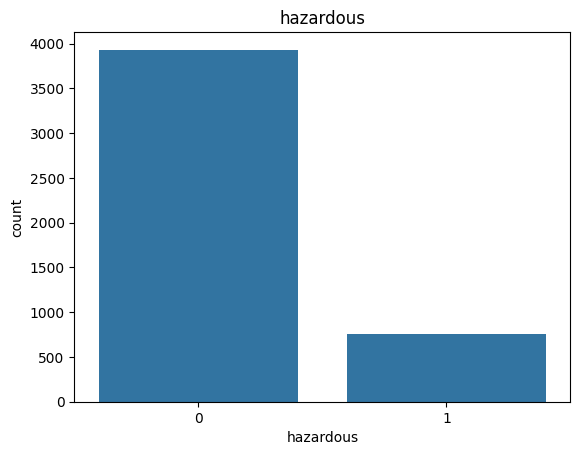

In [20]:
sns.countplot(data=df, x='hazardous').set(title='hazardous')
plt.show()

### Model

In [21]:
x = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=True, random_state=101)

In [23]:
xgb = XGBClassifier(n_jobs = -1, scoring='accuracy', random_state = 101)

In [24]:
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       784
           1       0.98      0.99      0.99       154

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



In [25]:
print(accuracy_score(y_test,y_pred))

0.9957356076759062


In [26]:
xgb_param_tree = {
    'max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'learning_rate' : [0.01,0.05,0.1,0.2,0.3],
    'n_estimators' : [5,10,20,50,100,200],
    'booster' : ['gbtree']
}

xgb_param_linear = {
    'learning_rate' : [0.01,0.05,0.1,0.2,0.3],
    'n_estimators' : [5,10,20,50,100,200],
    'lambda' : [0.1,1,10,100],
    'alpha' : [0.1,1,10,100],
    'booster' : ['gblinear']
}

In [29]:
random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=xgb_param_tree,
                                   n_iter=100,
                                   scoring='accuracy',
                                   cv=5,
                                   random_state=123)

random_search.fit(x_train, y_train)

results_df = pd.DataFrame(random_search.cv_results_)

In [30]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,param_booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.082706,0.031281,0.004245,0.000475,100,4,0.30,gbtree,"{'n_estimators': 100, 'max_depth': 4, 'learnin...",0.997333,0.997333,0.997333,0.993333,0.997330,0.996533,0.001600,10
1,0.015859,0.000966,0.003965,0.000700,5,10,0.05,gbtree,"{'n_estimators': 5, 'max_depth': 10, 'learning...",0.840000,0.840000,0.840000,0.838667,0.839786,0.839691,0.000519,80
2,0.058985,0.003455,0.004331,0.000300,50,8,0.10,gbtree,"{'n_estimators': 50, 'max_depth': 8, 'learning...",0.997333,0.996000,0.994667,0.993333,0.995995,0.995466,0.001359,45
3,0.032952,0.001865,0.004243,0.000957,20,7,0.30,gbtree,"{'n_estimators': 20, 'max_depth': 7, 'learning...",0.997333,0.996000,0.997333,0.993333,0.997330,0.996266,0.001554,22
4,0.108415,0.005020,0.005855,0.000638,200,9,0.30,gbtree,"{'n_estimators': 200, 'max_depth': 9, 'learnin...",0.997333,0.996000,0.996000,0.993333,0.997330,0.995999,0.001460,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.107204,0.006222,0.004124,0.000424,100,6,0.01,gbtree,"{'n_estimators': 100, 'max_depth': 6, 'learnin...",0.990667,0.997333,0.993333,0.992000,1.000000,0.994667,0.003477,64
96,0.022305,0.000905,0.004672,0.001039,10,10,0.01,gbtree,"{'n_estimators': 10, 'max_depth': 10, 'learnin...",0.840000,0.840000,0.840000,0.838667,0.839786,0.839691,0.000519,80
97,0.022993,0.002004,0.005158,0.000944,10,6,0.05,gbtree,"{'n_estimators': 10, 'max_depth': 6, 'learning...",0.990667,0.997333,0.996000,0.993333,1.000000,0.995467,0.003222,36
98,0.162963,0.002238,0.004110,0.000127,200,4,0.01,gbtree,"{'n_estimators': 200, 'max_depth': 4, 'learnin...",0.992000,0.998667,0.994667,0.992000,0.997330,0.994933,0.002719,58


In [31]:
print('\n The best parameters are : ')
print(random_search.best_params_)
print('----------------')
print(random_search.best_score_)


 The best parameters are : 
{'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'booster': 'gbtree'}
----------------
0.9970659546061416


### Best Model

In [32]:
model = random_search.best_estimator_
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9946695095948828


### BayesSearchCV

In [33]:
xgb_param_tree = {
    'booster' : Categorical(['gbtree']),
    'max_depth' : Integer(1,10),
    'learning_rate' : Real(0.01, 0.3, prior='uniform'),
    'n_estimators' : Integer(10,200),
    'subsample' : Real(0.5, 1.0, prior='uniform'),
    'colsample_bytree' : Real(0.5, 1.0, prior='uniform'),
    'gamma' : Real(0.0, 1.0, prior='uniform'),
    'reg_alpha' : Real(0.0, 1.0, prior='uniform'),
    'reg_lambda': Real(0.0, 1.0, prior='uniform')
}

xgb_param_linear = {
    'booster' : Categorical(['gblinear']),
    'learning_rate' : Real(0.01,0.3, prior='uniform'),
    'n_estimators' : Integer(10, 200),
    'alpha' : Real(0.0, 1.0, prior='uniform'),
    'lambda' : Real(0.0, 1.0, prior='uniform')
}

In [35]:
bayes_search = BayesSearchCV(estimator=xgb,
                             search_spaces=xgb_param_tree,
                             n_iter=20,
                             scoring='accuracy',
                             cv=5,
                             n_jobs=-1,
                             verbose=1,
                             random_state=42)

bayes_search.fit(x_train, y_train)

results = pd.DataFrame(bayes_search.cv_results_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [38]:
results[results['rank_test_score']<10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.066402,0.004495,0.003573,0.002206,gbtree,0.941658,0.303410,0.285855,9,22,0.138309,0.353587,0.817865,"{'booster': 'gbtree', 'colsample_bytree': 0.94...",0.996000,0.996000,0.997333,0.993333,0.997330,0.995999,0.001460,5
2,0.128811,0.027204,0.009160,0.003117,gbtree,0.959361,0.104859,0.135667,3,96,0.155448,0.751553,0.778670,"{'booster': 'gbtree', 'colsample_bytree': 0.95...",0.996000,0.997333,0.997333,0.996000,0.997330,0.996799,0.000653,2
4,0.128474,0.007736,0.003727,0.002213,gbtree,0.719015,0.526620,0.217557,9,146,0.424178,0.650284,0.676542,"{'booster': 'gbtree', 'colsample_bytree': 0.71...",0.994667,0.998667,0.994667,0.994667,0.997330,0.995999,0.001686,4
6,0.110304,0.009665,0.003555,0.003445,gbtree,0.887682,0.359023,0.263554,6,123,0.648778,0.422083,0.866941,"{'booster': 'gbtree', 'colsample_bytree': 0.88...",0.994667,0.996000,0.994667,0.994667,0.997330,0.995466,0.001065,9
8,0.084705,0.011738,0.005601,0.004581,gbtree,0.850311,0.871652,0.130588,4,50,0.000061,0.370685,0.797189,"{'booster': 'gbtree', 'colsample_bytree': 0.85...",0.994667,0.996000,0.994667,0.994667,0.997330,0.995466,0.001065,9
10,0.111248,0.003864,0.003785,0.003513,gbtree,0.620871,0.828485,0.089652,1,190,0.993167,0.843464,0.916734,"{'booster': 'gbtree', 'colsample_bytree': 0.62...",0.994667,0.998667,0.994667,0.996000,0.995995,0.995999,0.001461,6
12,0.132474,0.006401,0.004173,0.005112,gbtree,0.763481,0.277762,0.088425,6,97,0.173420,0.253973,0.571160,"{'booster': 'gbtree', 'colsample_bytree': 0.76...",0.996000,0.998667,0.994667,0.996000,0.994660,0.995999,0.001462,7
13,0.139199,0.004968,0.004174,0.004382,gbtree,0.614929,0.030663,0.166569,2,131,0.033923,0.913297,0.922718,"{'booster': 'gbtree', 'colsample_bytree': 0.61...",0.996000,1.000000,0.996000,0.996000,0.997330,0.997066,0.001555,1
17,0.135511,0.008220,0.002022,0.004044,gbtree,0.598894,0.062749,0.295577,7,178,0.967035,0.880154,0.775765,"{'booster': 'gbtree', 'colsample_bytree': 0.59...",0.996000,0.998667,0.994667,0.993333,0.995995,0.995732,0.001769,8
18,0.162576,0.003349,0.004173,0.002087,gbtree,0.906968,0.000000,0.300000,4,200,0.193824,1.000000,0.516419,"{'booster': 'gbtree', 'colsample_bytree': 0.90...",0.996000,0.998667,0.997333,0.996000,0.995995,0.996799,0.001067,3


In [39]:
print(f'Best BayesianCV params : {bayes_search.best_params_}')
print('---------------------------')
print(f'Best BayesianCV accuracy : {bayes_search.best_score_}')

Best BayesianCV params : OrderedDict({'booster': 'gbtree', 'colsample_bytree': 0.6149286481961129, 'gamma': 0.030662617520129117, 'learning_rate': 0.16656919824658983, 'max_depth': 2, 'n_estimators': 131, 'reg_alpha': 0.03392327481642233, 'reg_lambda': 0.9132972088076128, 'subsample': 0.9227181372610103})
---------------------------
Best BayesianCV accuracy : 0.9970659546061416


### Best Bayes model

In [41]:
model = bayes_search.best_estimator_
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(accuracy_score(y_test, y_pred))

0.9968017057569296
